In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [8]:
filePath = "./data/fullRuns_histsOnly/"
files = os.listdir(filePath)
print(len(files), "files")
print(files)

59 files
['gm2nearline_histsOnly_run24276.root', 'gm2nearline_histsOnly_run24277.root', 'gm2nearline_histsOnly_run24278.root', 'gm2nearline_histsOnly_run24279.root', 'gm2nearline_histsOnly_run24280.root', 'gm2nearline_histsOnly_run24281.root', 'gm2nearline_histsOnly_run24282.root', 'gm2nearline_histsOnly_run24283.root', 'gm2nearline_histsOnly_run24284.root', 'gm2nearline_histsOnly_run24285.root', 'gm2nearline_histsOnly_run24286.root', 'gm2nearline_histsOnly_run24287.root', 'gm2nearline_histsOnly_run24288.root', 'gm2nearline_histsOnly_run24289.root', 'gm2nearline_histsOnly_run24293.root', 'gm2nearline_histsOnly_run24294.root', 'gm2nearline_histsOnly_run24295.root', 'gm2nearline_histsOnly_run24309.root', 'gm2nearline_histsOnly_run24310.root', 'gm2nearline_histsOnly_run24311.root', 'gm2nearline_histsOnly_run24314.root', 'gm2nearline_histsOnly_run24315.root', 'gm2nearline_histsOnly_run24316.root', 'gm2nearline_histsOnly_run24317.root', 'gm2nearline_histsOnly_run24318.root', 'gm2nearline_hi

In [32]:
for i, file in enumerate(files):
    print(i, int(file[25:30]))

0 24276
1 24277
2 24278
3 24279
4 24280
5 24281
6 24282
7 24283
8 24284
9 24285
10 24286
11 24287
12 24288
13 24289
14 24293
15 24294
16 24295
17 24309
18 24310
19 24311
20 24314
21 24315
22 24316
23 24317
24 24318
25 24319
26 24320
27 24321
28 24322
29 24323
30 24324
31 24325
32 24326
33 24327
34 24328
35 24329
36 24330
37 24331
38 24332
39 24333
40 24334
41 24335
42 24336
43 24337
44 24338
45 24339
46 24340
47 24341
48 24342
49 24343
50 24344
51 24345
52 24346
53 24347
54 24348
55 24349
56 24350
57 24351
58 24352


In [79]:
file = filePath+files[55]
f = r.TFile(file)
f.cd("nearlineHistTree")
f.ls()

TFile**		./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24349.root	
 TFile*		./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24349.root	
  TDirectoryFile*		nearlineHistTree	nearlineHistTree (CaloNearlineHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	calo13;1	calo13
   KEY: TDirectoryFile	calo14;1	calo14
   KEY: TDirectoryFile	calo15;1	calo15
   KEY: TDirectoryFile	calo16;1	calo16
   KEY: TDirectoryFile	calo17;1	calo17
   KEY: TDirectoryFile	calo18;1	calo18
   KEY: TDirectoryFile	calo19;1	calo19
   KEY: TDirectoryFile	calo20;1	calo20
   KEY: T

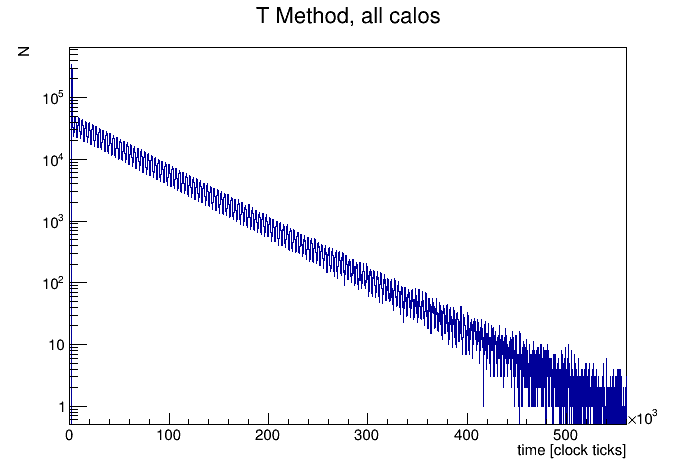

In [80]:
h = f.Get("nearlineHistTree").Get("allCaloWiggle").Clone()
c = r.TCanvas()
h.Draw()
c.SetLogy()
c.Draw()

In [81]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'What a time to be alive!')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [82]:
func = r.TF1("func", blinded_wiggle, 30,600,5)
labels = ['N','#tau','A','R','#phi']
for i, label in enumerate(labels):
    func.SetParName(i, label)
func.SetParameters(700000,64.4,0.4,0,0)
func.SetParLimits(4,-0.001 - 2*math.pi,2*math.pi+0.001)
func.SetLineColor(2)
func.SetNpx(2000)

### Five parameter fit

0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
 FCN=4056.54 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         523 TOTAL
                     EDM=3.87996e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            4.17799e+04   2.21925e+01  -4.32589e-03  -2.65483e-09
   2  #tau         6.41711e+01   1.91976e-02  -6.19398e-07   8.57257e-06
   3  A            3.67617e-01   3.98383e-04  -1.83747e-07   3.81516e-05
   4  R           -4.00796e+01   1.21166e+01   4.01970e-04  -2.24537e-08
   5  #phi        -9.82047e-01   1.98697e-03   1.98697e-03   7.18512e-03
 FCN=4056.54 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         282 TOTAL
                     EDM=2.08092e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SI

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


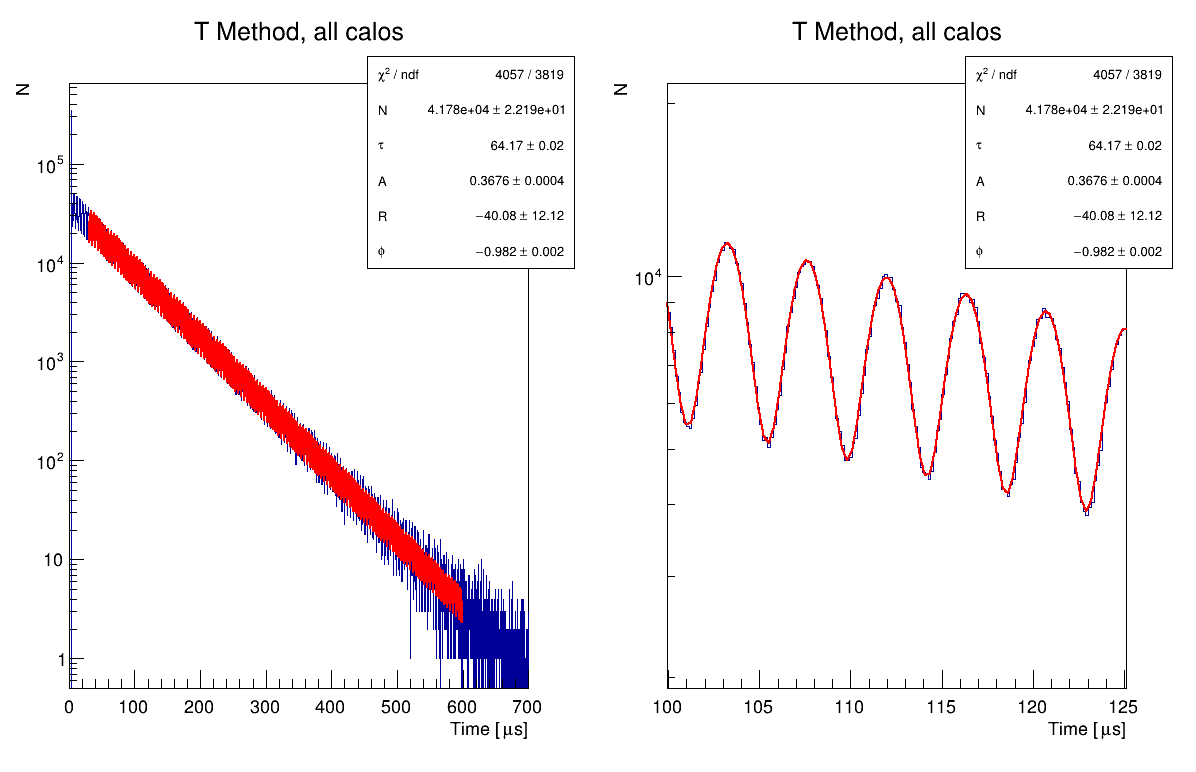

In [83]:
c2 = r.TCanvas("c2","c2",1200,800)
c2.Divide(2,1)
c2.cd(1)
r.gPad.SetLogy()

r.gStyle.SetOptFit(111)
allCaloWiggle = f.Get("nearlineHistTree").Get("allCaloWiggle").Clone()

print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

for fit in range(2):
    print("Sarting fit:", fit+1)
    allCaloWiggle.Fit("func","REM")

    
chiSqAll = ( ( func.GetNDF(),
              func.GetChisquare(),
              func.GetProb() ) )
    
allCaloWiggle.Draw()

c2.cd(2)
ding =  allCaloWiggle.Clone()
ding.GetXaxis().SetRangeUser(100,125)
ding.Draw()

r.gPad.SetLogy()
c2.Draw()

---

### Now lets start looping over these files. Lets first see which ones have any entries in the wiggle.

In [21]:
runs = []
Nwiggle = []
for ding in files:
    file = filePath+ding
    f = r.TFile(file)
    f.cd("nearlineHistTree")
    #f.ls()
    allCaloWiggle = f.Get("nearlineHistTree").Get("allCaloWiggle")
    print(allCaloWiggle.GetEntries(),"entries in ", file)
    run = int(file[51:56])
    Nwiggle.append(allCaloWiggle.GetEntries())
    runs.append(run)

53.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24276.root
146205.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24277.root
57907.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24278.root
168816.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24279.root
210816.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24280.root
133635.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24281.root
197095.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24282.root
5257269.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24283.root
1279569.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24284.root
33063457.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24285.root
23257782.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24286.root
30436113.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24287.root
3

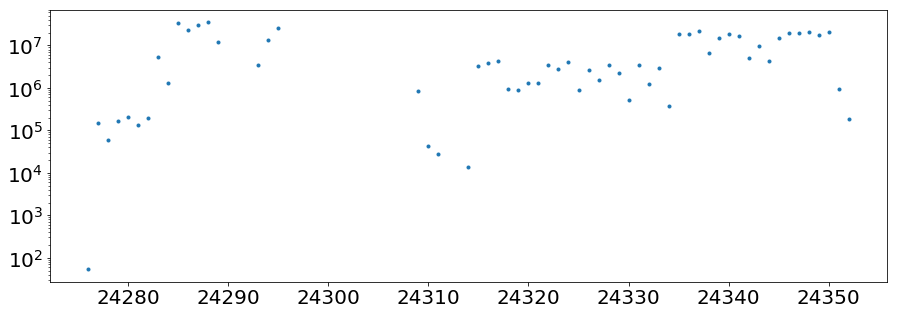

In [26]:
fig,ax = plt.subplots(figsize=(15,5))
plt.plot(runs,Nwiggle,".")
plt.yscale("log")
plt.show()

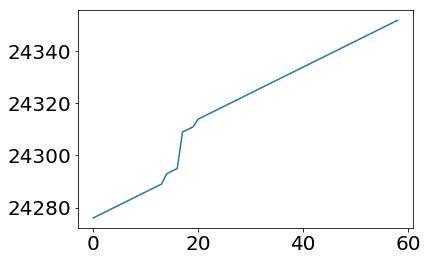

In [33]:
plt.plot(runs)

---

### There seems to be a good number except in the first. Lets exclude that one and then move from there.

We start by dividing up into two groups, before and after the sync pulse energy change.

In [55]:
group1 = [x for x in range(1,17)]
group2 = [x for x in range(17, len(files))]

In [103]:
runs1 = []
Nwiggle1 = []
pars = []
parErrs = []
chisqs = []
for i in [x for x in range(0, len(files))]:
    file = filePath+files[i]
    f = r.TFile(file)
    f.cd("nearlineHistTree")
    #f.ls()
    allCaloWiggle = f.Get("nearlineHistTree").Get("allCaloWiggle")
    
    if( allCaloWiggle.GetEntries() < 5000000 ):
        continue
    
    print(allCaloWiggle.GetEntries(),"entries in ", file)
    run = int(file[51:56])
    Nwiggle1.append(allCaloWiggle.GetEntries())
    runs1.append(run)
    
    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")
    
    func.SetParameters(70000,64.4,0.4,0,0)

    for fit in range(2):
        print("Sarting fit:", fit+1)
        allCaloWiggle.Fit("func","REM")
    
    pars.append([func.GetParameter(x) for x in range(5)])
    parErrs.append([func.GetParError(x) for x in range(5)])
    chisqs.append([func.GetNDF(),
                  func.GetChisquare(),
                  func.GetProb()])

5257269.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24283.root
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
33063457.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24285.root
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
23257782.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24286.root
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
30436113.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24287.root
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
35021800.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24288.root
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
11846803.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24289.root
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
13164942.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24294.root
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
26478207.0 entries in  ./data/fullR

[1.0126446628642718, 0.9166864450140864, 0.9429885859834282, 0.9570022387396255, 0.9870506737496016, 0.945244778963053, 0.94064410993939, 0.9300356435791275, 0.9168901929096793, 0.9321675932512453, 0.9412395092966168, 0.969977132786209, 0.9124482700226981, 0.9739966813021084, 0.9908604638504075, 1.0180707385645016, 0.9174224749985149, 0.9460004515917702, 0.8638957106563999, 0.9009494907961875, 0.91030853321006, 0.941442915647912, 0.9273589955353747]


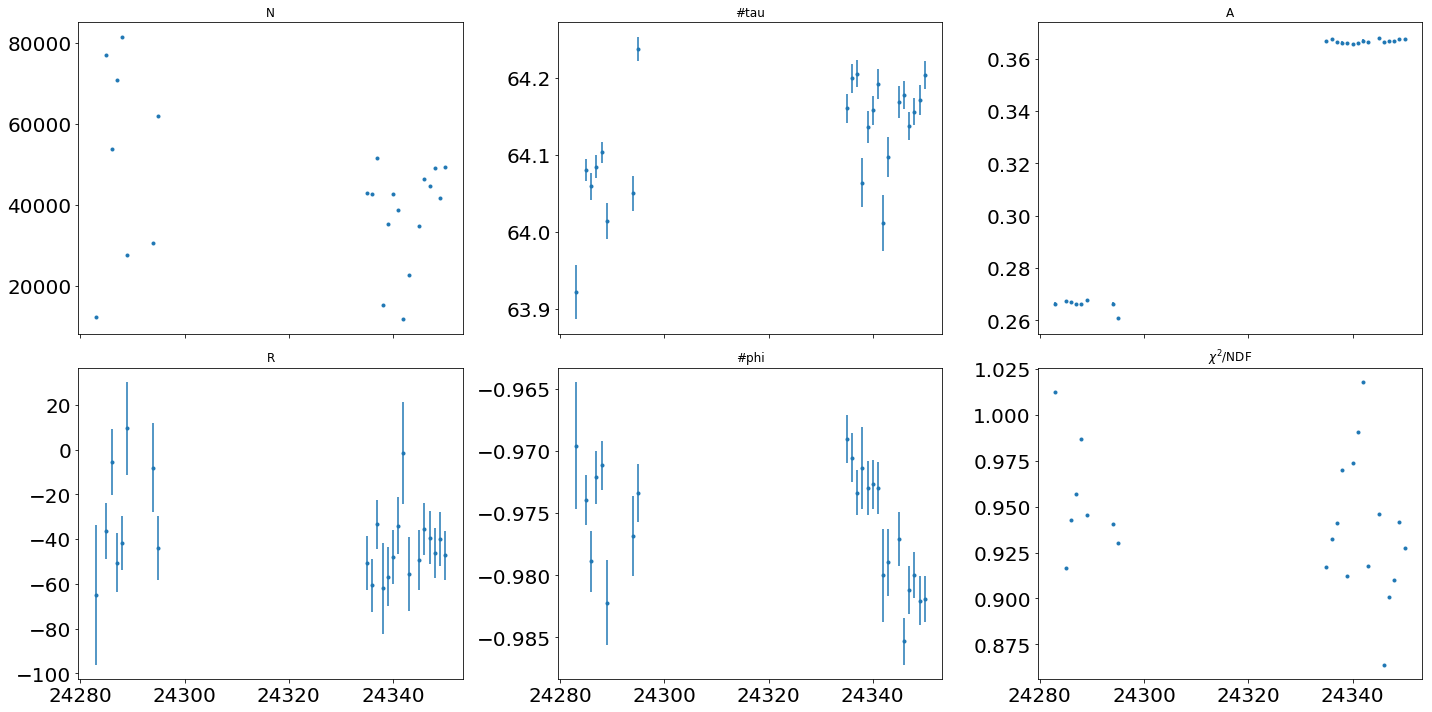

In [121]:
fig,ax = plt.subplots(2,3,figsize=(20,10),sharex=True)
errs = [x for x in zip(*parErrs)]
for i, ding in enumerate(zip(*pars)):
    axi = ax[int(i/3)][int(i%3)]
    #axi.plot(runs1,ding)
    axi.errorbar(runs1,ding,yerr=errs[i],fmt=".")
    axi.set_title(labels[i])
    
chisqOverNdf = [x/y for x, y, z in chisqs]
print(chisqOverNdf)

axi = ax[1][2]
axi.plot(runs1, chisqOverNdf, ".")
axi.set_title(r'$\chi^{2}$/NDF')

plt.tight_layout()
plt.show()

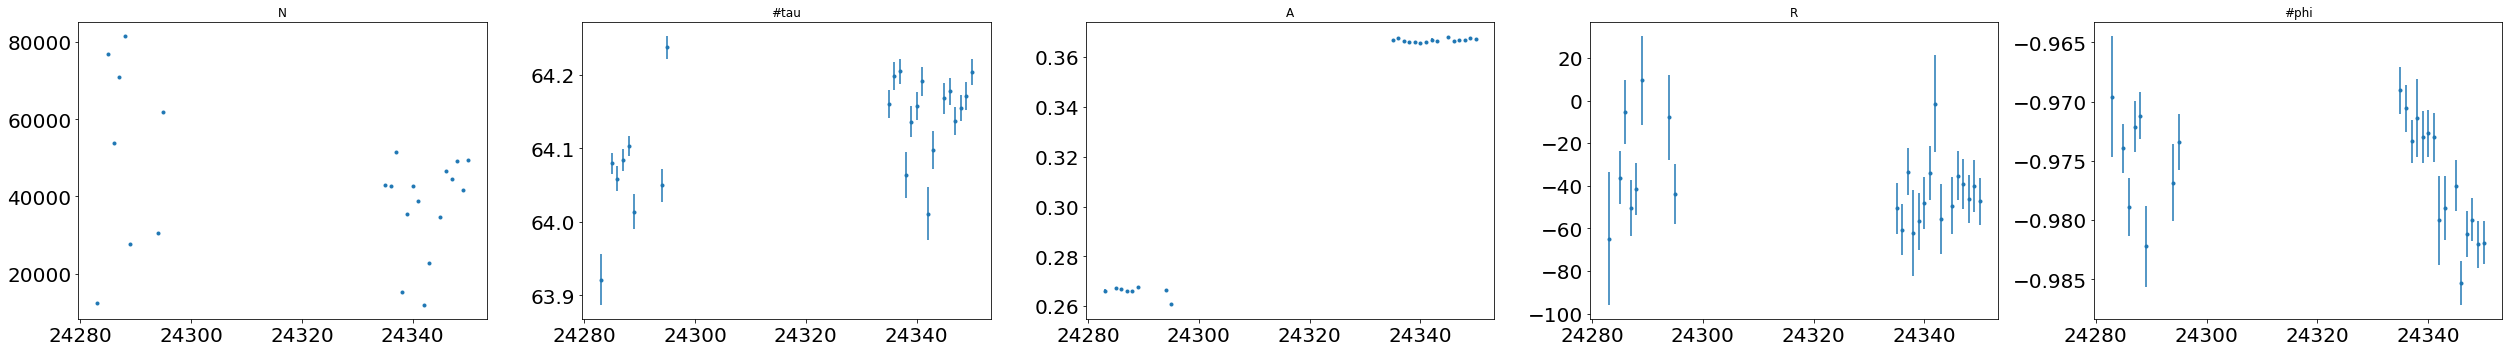

In [109]:
fig,ax = plt.subplots(1,5,figsize=(35,5))
errs = [x for x in zip(*parErrs)]
for i, ding in enumerate(zip(*pars)):
    axi = ax[i]
    #axi.plot(runs1,ding)
    axi.errorbar(runs1,ding,yerr=errs[i],fmt=".")
    axi.set_title(labels[i])
plt.tight_layout()
plt.show()

---

### We can also add in some CBO terms to try to make up for the empty feeling in our hearts

In [122]:
def blinded_wiggle_cbo(x, p):
    norm     = p[0]
    life     = p[1]
    asym     = p[2]
    R        = p[3]
    phi      = p[4]
    A1       = p[5]
    A2       = p[6]
    A3       = p[7]
    lifeCBO  = p[8]
    omegaCBO = p[9]
    phiCBO1  = p[10]
    phiCBO2  = p[11]
    phiCBO3  = p[12]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
    
    cCBO = 1-math.exp(-time/lifeCBO)*A1*math.cos(omegaCBO*time + phiCBO1)
    ACBO = asym * (1 - math.exp(-time/lifeCBO) * A2 * math.cos(omegaCBO*time + phiCBO2))
    phiCBO = phi + math.exp(-time/lifeCBO)*A3*math.cos(omegaCBO*time + phiCBO3)
    
    return norm * math.exp(-time/life) * cCBO * (1 - ACBO*math.cos(omega*time + phiCBO))

In [123]:
func13 = r.TF1("func13", blinded_wiggle_cbo, 30,500,13)
func13.SetParNames('N','#tau','A',
                   'R','#phi','A_{1}',
                   'A_{2}','A_{3}','#tau_{CBO}',
                   '#omega_{CBO}','#phi_{CBO - 1}')
func13.SetParName(11,'#phi_{CBO - 2}')
func13.SetParName(12,'#phi_{CBO - 3}')
#func13.SetParLimits(4,-6.3,6.3) #Phases should be restricted to +/- 2Pi
#func13.SetParLimits(8,100,500) #Avoid divide by 0 error
func13.SetParLimits(8,0.0000001,100000000) #Avoid divide by 0 error
#func13.SetParLimits(10,-6.3,6.3) 
#func13.SetParLimits(11,-6.3,6.3)
#func13.SetParLimits(12,-6.3,6.3)

#initial guesses, then updated with the first round of fit results
#func13.SetParameters(1500,64.4,0.4,0,0,1,1,1,.01,.01,0)
#func13.SetParameter(11,0)
#func13.SetParameter(12,0)
func13.SetParameters(100000, 64.32689658986958, -0.41149191856871803, 
                     -11.31981267111425, -4.201648334505292, -0.666502391530784, 
                     0.6927259503578, -0.38908021438317, 220, 
                     4.1, 0.4745581246420292)
func13.SetParameter(11, 6.299934663288357)
func13.SetParameter(12, 0.28579778778899545)
#func13.FixParameter(12,0) #currently this parameter is fixed, as it doesn't behave well if left to wander on its own


func13.SetLineColor(2)
func13.SetNpx(2000)

0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
 FCN=2595.14 FROM MIGRAD    STATUS=FAILED       1794 CALLS        1795 TOTAL
                     EDM=479.598    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            4.43280e+02   5.55530e+00   0.00000e+00  -3.91322e+00
   2  #tau         6.29695e+01   3.35665e+00   0.00000e+00  -2.84335e+01
   3  A           -4.40198e-01   3.33308e+00   0.00000e+00  -8.75606e+03
   4  R           -3.05313e+02   2.36239e+02   0.00000e+00   8.97517e-03
   5  #phi        -4.07778e+00   3.33336e+00  -0.00000e+00   2.01234e+02
   6  A_{1}       -2.84604e+00   3.34437e+00   0.00000e+00  -2.91347e+00
   7  A_{2}       -8.91402e+00   4.18431e+00   0.00000e+00   9.82130e-01
   8  A_{3}        1.57067e+01   4.36872e+00  -0.00000e+00   1.52347e+00
   9  #tau_{CBO}   6.67749e+00   9.95406e+07   0.00000e+00** at li

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.


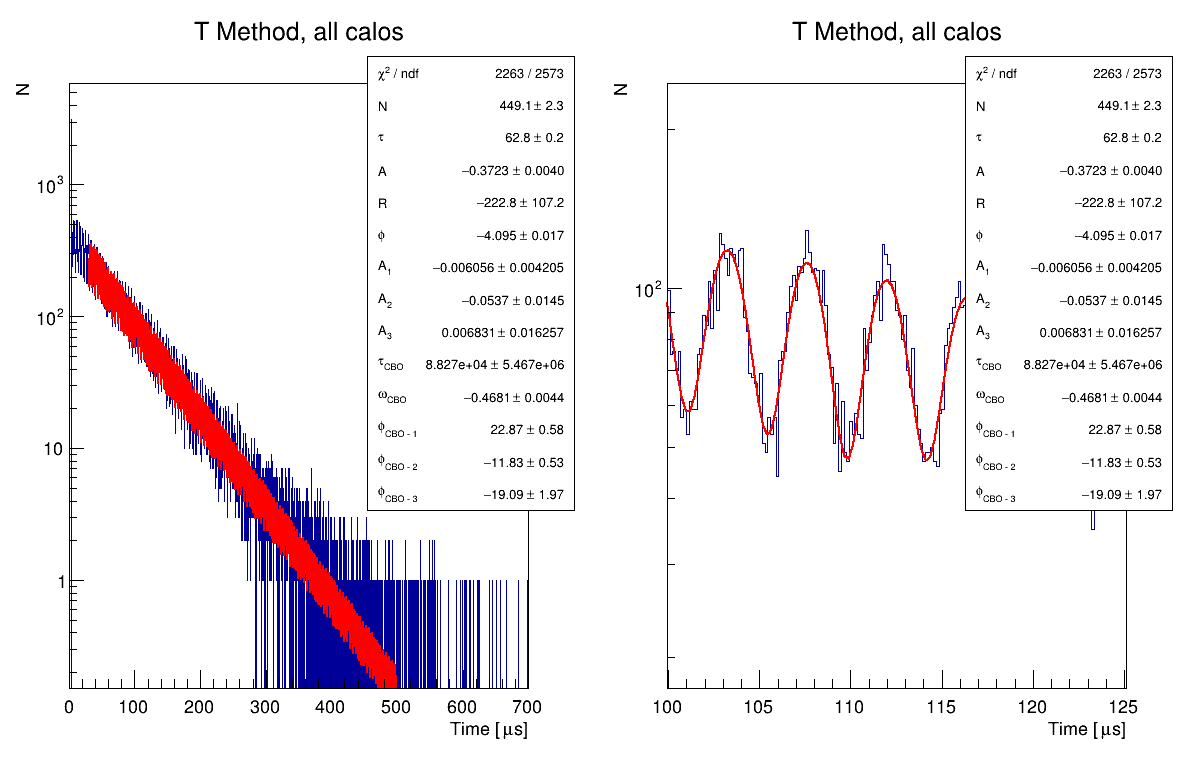

In [124]:
c2 = r.TCanvas("c2","c2",1200,800)
c2.Divide(2,1)
c2.cd(1)
r.gPad.SetLogy()

r.gStyle.SetOptFit(111)
allCaloWiggle = f.Get("nearlineHistTree").Get("allCaloWiggle").Clone()

print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

for fit in range(2):
    print("Sarting fit:", fit+1)
    allCaloWiggle.Fit("func13","REM")

    
chiSqAll = ( ( func13.GetNDF(),
              func13.GetChisquare(),
              func13.GetProb() ) )
    
allCaloWiggle.Draw()

c2.cd(2)
ding =  allCaloWiggle.Clone()
ding.GetXaxis().SetRangeUser(100,125)
ding.Draw()

r.gPad.SetLogy()
c2.Draw()

In [130]:
runs13 = []
Nwiggle13 = []
pars13 = []
parErrs13 = []
chisqs13 = []
#for i in [x for x in range(0, len(files))]:
for i in [x for x in range(0, 10)]:
    file = filePath+files[i]
    f = r.TFile(file)
    f.cd("nearlineHistTree")
    #f.ls()
    allCaloWiggle = f.Get("nearlineHistTree").Get("allCaloWiggle")
    
    if( allCaloWiggle.GetEntries() < 5000000 ):
        continue
    
    print(allCaloWiggle.GetEntries(),"entries in ", file)
    run = int(file[51:56])
    Nwiggle13.append(allCaloWiggle.GetEntries())
    runs13.append(run)
    
    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")
    
    func13.SetParameters(100000, 64.32689658986958, -0.41149191856871803, 
                         -11.31981267111425, -4.201648334505292, -0.666502391530784, 
                         0.6927259503578, -0.38908021438317, 220, 
                         4.1, 0.4745581246420292)
    func13.SetParameter(11, 6.299934663288357)
    func13.SetParameter(12, 0.28579778778899545)
    
    for fit in range(1):
        print("Sarting fit:", fit+1)
        allCaloWiggle.Fit("func13","REM")
    
    pars13.append([func13.GetParameter(x) for x in range(13)])
    parErrs13.append([func13.GetParError(x) for x in range(13)])
    chisqs13.append([func13.GetNDF(),
                  func13.GetChisquare(),
                  func13.GetProb()])

5257269.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24283.root
0.0 560000.0
0.0 700.0
Sarting fit: 1
33063457.0 entries in  ./data/fullRuns_histsOnly/gm2nearline_histsOnly_run24285.root
0.0 560000.0
0.0 700.0
Sarting fit: 1
 FCN=3192.45 FROM MIGRAD    STATUS=CALL LIMIT   3162 CALLS        3163 TOTAL
                     EDM=6.6358e-06    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.23158e+04   1.22730e+01  -9.75514e-04  -5.39402e-05
   2  #tau         6.39624e+01   3.58578e-02   2.45916e-06   4.68713e-02
   3  A           -2.67199e-01   8.17110e-04   7.23334e-07   4.72395e-01
   4  R           -5.64060e+01   3.39524e+01   5.75639e-03  -5.47761e-07
   5  #phi        -4.11266e+00   5.95671e-03  -1.39780e-06  -3.75889e-01
   6  A_{1}       -2.10701e+00   1.30765e+00   4.83129e-04  -9.29389e-02
   7  A_{2}      

Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.


---

### and now the combined file

In [135]:
f = r.TFile("./data/fullRuns_histsOnly/gm2nearline_combined.root")
f.cd("FastRotation")
f.ls()

TFile**		./data/fullRuns_histsOnly/gm2nearline_combined.root	
 TFile*		./data/fullRuns_histsOnly/gm2nearline_combined.root	
  TDirectoryFile*		FastRotation	FastRotation
   KEY: TH1F	hHitTimes;1	Aligned Hit Times
   KEY: TH1F	hSignal_Num;1	Signal Numerator (50% of events)
   KEY: TH1F	hSignal_Den;1	Signal Denominator (50% of events time smeared)
  KEY: TDirectoryFile	nearlineHistTree;1	nearlineHistTree (CaloNearlineHistograms) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder
  KEY: TDirectoryFile	t0Analyzer;1	t0Analyzer (T0PulseProcessorAnalyzer) folder
  KEY: TDirectoryFile	ibmsAnalyzer;1	ibmsAnalyzer (IBMSAnalyzer) folder
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	FastRotation;1	FastRotation


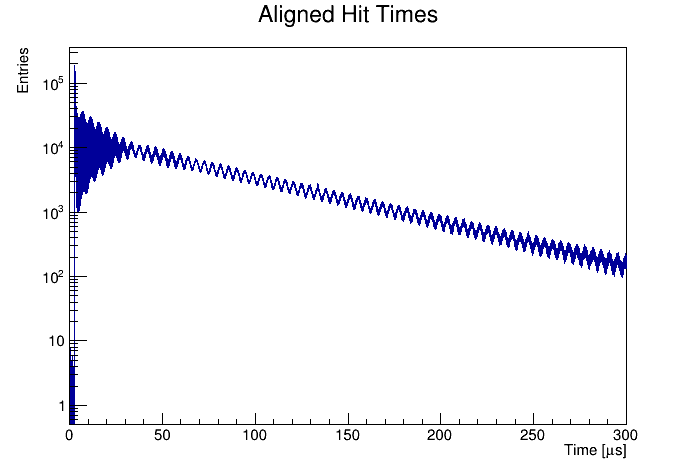

In [138]:
hHitTimes = f.Get("FastRotation").Get("hHitTimes").Clone()
c = r.TCanvas()
hHitTimes.GetXaxis().SetRangeUser(0,300)
hHitTimes.Draw()
c.SetLogy()
c.Draw()

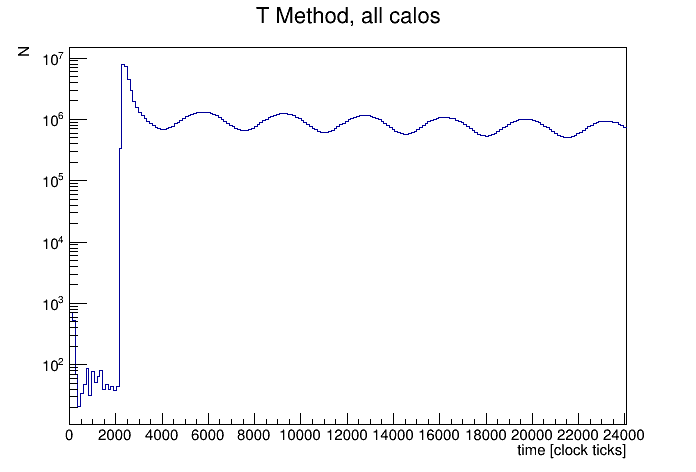

In [141]:
h = f.Get("nearlineHistTree").Get("allCaloWiggle").Clone()
c = r.TCanvas()
h.GetXaxis().SetRangeUser(0,30*1000/1.25)
h.Draw()
c.SetLogy()
c.Draw()